In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [50]:
df[['sleep_quality', 'sleep_hours']]

,sleep_quality,sleep_hours
0,average,4.9
1,poor,4.7
2,poor,5.8
3,average,8.3
4,good,9.6
...,...,...
629995,good,4.1
629996,average,4.5
629997,poor,4.3
629998,average,8.2


In [4]:
X, y = df.drop(['id', 'exam_score'], axis=1), df['exam_score']

In [5]:
numeric_cols = X.select_dtypes(exclude='object').columns

In [6]:
X = pd.get_dummies(
    X, 
    columns=['gender', 'course', 'internet_access', 'study_method'], 
    prefix=['gender', 'course', 'internet_access', 'study_method'], 
    drop_first=True
)

In [7]:
for column in X.select_dtypes('object').columns:
    print(X[column].value_counts())

sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64
facility_rating
medium    214082
low       212378
high      203540
Name: count, dtype: int64
exam_difficulty
moderate    353982
easy        176540
hard         99478
Name: count, dtype: int64


In [8]:
sleep_map = {
    'poor': 0,
    'good': 1,
    'average': 2
}
facility_map = {
    'low': 0,
    'medium': 1,
    'high': 2
}
exam_map = {
    'easy': 0,
    'moderate': 1,
    'hard': 2
}
X['sleep_quality'] = X['sleep_quality'].replace(sleep_map)
X['facility_rating'] = X['facility_rating'].replace(facility_map)
X['exam_difficulty'] = X['exam_difficulty'].replace(exam_map)


/var/folders/v5/gy4nc82s2w94_ymtt7vqyxdc0000gn/T/ipykernel_9517/2010030326.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['sleep_quality'] = X['sleep_quality'].replace(sleep_map)
/var/folders/v5/gy4nc82s2w94_ymtt7vqyxdc0000gn/T/ipykernel_9517/2010030326.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['facility_rating'] = X['facility_rating'].replace(facility_map)
/var/folders/v5/gy4nc82s2w94_ymtt7vqyxdc0000gn/T/ipykernel_9517/2010030326.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will b

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

<Axes: >

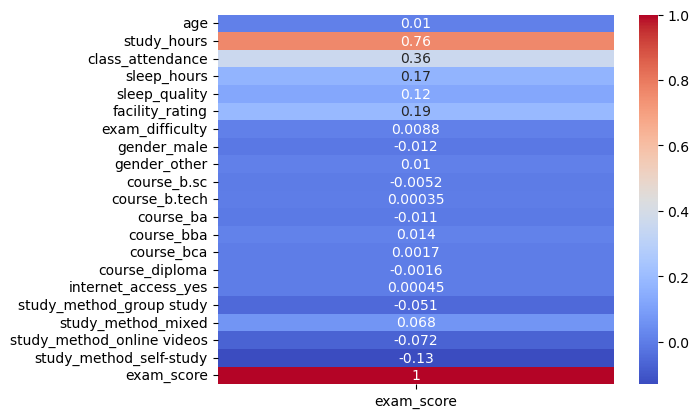

In [10]:
corr = X.assign(exam_score=y).corr(numeric_only=True)['exam_score'].to_frame()

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, r2_score

model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [45]:
y_pred = model.predict(X_test)
root_mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(9.423371103198896, 0.7510881272414738)

In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
y_pred = model.predict(X_test)
root_mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(9.158656731178649, 0.7648762026705795)